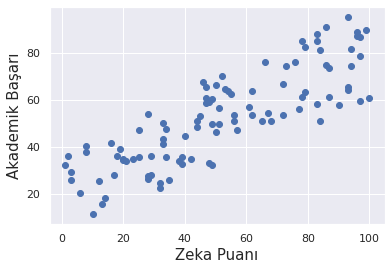

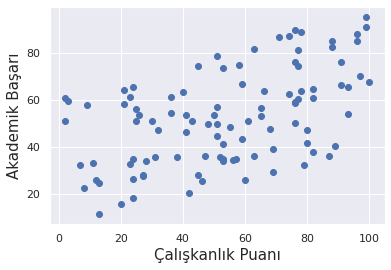

Ogrencinin zeka puanini giriniz 50
Ogrencinin caliskanlik puanini giriniz 50
50.000000000000014
[[0.6 0.4]]
Ogrencinin akademik basarisi :  [[50.]]


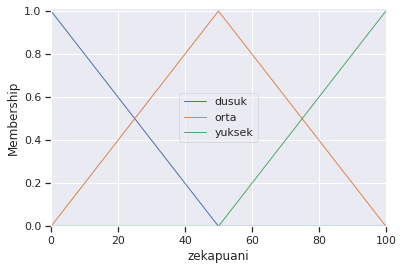

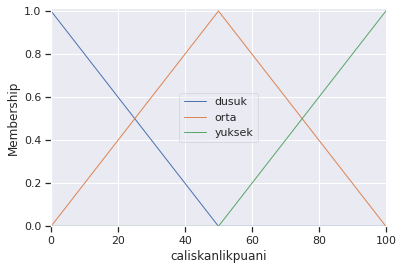

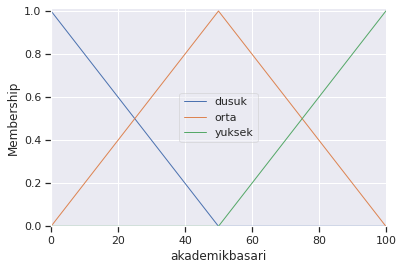

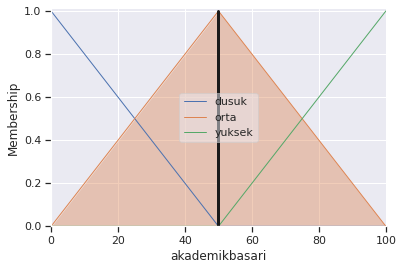

In [65]:
!pip install -U scikit-fuzzy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import skfuzzy.membership as mf

warnings.filterwarnings('ignore')


from sklearn.linear_model import LinearRegression

x = pd.DataFrame({'zekapuani': [93,39,78,1,76,18,23,46,20,39,72,8,93,42,49,62,16,78,8,25,68,100,28,87,3,53,97,52,93,3,20,86,50,96,34,13,62,2,17,32,87,
 97,40,57,94,47,79,34,66,29,51,14,49,99,35,6,72,45,25,47,94,55,33,28,28,44,83,84,90,47,29,96,77,32,84,65,33,54,49,56,48,33,21,48,97,10,44,38,19,67,56,50,
 51,83,12,79,73,61,86,83],
                   'caliskanlikpuani': [24,31,36,79,76,63,53,100,57,23,26,89,99,24,77,66,80,96,82,80,25,2,93,23,69,82,51,97,21,60,56,58,91,78,68,20,41,
 87,45,8,53,71,51,32,45,93,40,38,91,47,65,24,51,76,12,42,59,65,52,76,63,74,76,24,27,61,88,2,9,82,27,74,25,13,77,30,53,78,7,50,76,59,53,11,3,13,55,28,69,36,
 43,41,48,96,46,88,77,51,99,21]})

y = pd.DataFrame({'akademikbasari':[65.4,35.8,61.2,32.2,76,36,35,67.6,34.8,32.6,53.6,40.4,95.4,34.8,60.2,63.6,41.6,85.2,37.6,47,50.8,60.8,54,61.4,29.4,64.6,
 78.6,70,64.2,25.8,34.4,74.8,66.4,88.8,47.6,15.8,53.6,36,28.2,22.4,73.4,86.6,44.4,47,74.4,65.4,63.4,35.6,76,36.2,56.6,18,49.8,89.8,25.8,20.4,66.8,53,35.8,
 58.6,81.6,62.6,50.2,26.4,27.6,50.8,85,51.2,57.6,61,28.2,87.2,56.2,24.4,81.2,51,41,63.6,32.2,53.6,59.2,43.4,33.8,33.2,59.4,11.2,48.4,34,39,54.6,50.8,46.4,
 49.8,88.2,25.6,82.6,74.6,57,91.2,58.2]})																																																																																																																																																																																				


plt.scatter(x['zekapuani'],y)
plt.xlabel('Zeka Puanı', fontsize = 15)
plt.ylabel('Akademik Başarı', fontsize = 15)
plt.show() # Zeka Puani ve Akademik Basari eksenlerine gore sacilim grafigini gosterir

plt.scatter(x['caliskanlikpuani'],y)
plt.xlabel('Çalışkanlık Puanı', fontsize = 15)
plt.ylabel('Akademik Başarı', fontsize = 15)
plt.show() # Caliskanlik Puani ve Akademik Basari eksenlerine gore sacilim grafigini gosterir

reg = LinearRegression() # Dogrusal bir regresyon nesnesi olusturduk
reg.fit(x,y)  # Burada x bagimsiz degiskenleri, y ise bagimli degiskeni belirtir

zekapuani = ctrl.Antecedent (np.arange (0, 101, 1), 'zekapuani')
caliskanlikpuani = ctrl.Antecedent (np.arange (0, 101, 1), 'caliskanlikpuani')
akademikbasari = ctrl.Consequent (np.arange (0, 101, 1), 'akademikbasari')

zekapuani ['dusuk']= fuzz.trimf (zekapuani.universe, [0, 0, 50])
zekapuani ['orta']= fuzz.trimf (zekapuani.universe, [0, 50, 100])
zekapuani ['yuksek']= fuzz.trimf (zekapuani.universe, [50, 100, 100])

caliskanlikpuani ['dusuk']= fuzz.trimf (caliskanlikpuani.universe, [0, 0, 50])
caliskanlikpuani ['orta']= fuzz.trimf (caliskanlikpuani.universe, [0, 50, 100])
caliskanlikpuani ['yuksek']= fuzz.trimf (caliskanlikpuani.universe, [50, 100, 100])

akademikbasari ['dusuk']= fuzz.trimf (akademikbasari.universe, [0, 0, 50])
akademikbasari ['orta']= fuzz.trimf (akademikbasari.universe, [0, 50, 100])
akademikbasari ['yuksek']= fuzz.trimf (akademikbasari.universe, [50, 100, 100])

zekapuani.view()
caliskanlikpuani.view()
akademikbasari.view()

rulel = ctrl.Rule(zekapuani['dusuk'] & caliskanlikpuani ['dusuk'], akademikbasari['dusuk'])
rule2 = ctrl.Rule(zekapuani['dusuk'] & caliskanlikpuani ['orta'], akademikbasari['dusuk'])
rule3 = ctrl.Rule(zekapuani['dusuk'] & caliskanlikpuani ['yuksek'], akademikbasari['orta'])
rule4 = ctrl.Rule(zekapuani['orta'] & caliskanlikpuani ['dusuk'], akademikbasari['dusuk'])
rule5 = ctrl.Rule(zekapuani['orta'] & caliskanlikpuani ['orta'], akademikbasari['orta'])
rule6 = ctrl.Rule(zekapuani['orta'] & caliskanlikpuani ['yuksek'], akademikbasari['yuksek'])
rule7 = ctrl.Rule(zekapuani['yuksek'] & caliskanlikpuani ['dusuk'], akademikbasari['orta'])
rule8 = ctrl.Rule(zekapuani['yuksek'] & caliskanlikpuani ['orta'], akademikbasari['yuksek'])
rule9 = ctrl.Rule(zekapuani['yuksek'] & caliskanlikpuani ['yuksek'], akademikbasari['yuksek'])



input_zekapuani = input("Ogrencinin zeka puanini giriniz ")
input_caliskanlikpuani = input("Ogrencinin caliskanlik puanini giriniz ")

a= input_zekapuani
b= input_caliskanlikpuani

akademik_ctrl = ctrl.ControlSystem ([rulel, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
akademik = ctrl.ControlSystemSimulation(akademik_ctrl)

akademik.input ['zekapuani'] = int(a)
akademik.input ['caliskanlikpuani'] = int(b)
akademik.compute()
print(akademik.output ['akademikbasari'])
tahmin = reg.predict([[input_zekapuani,input_caliskanlikpuani]]) # Kullanicidan alinan bagimsiz degiskenlerle sinav puanini tahmin ettirdik
print('Ogrencinin akademik basarisi : ', tahmin)

akademikbasari.view(akademik)